In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D  #2Dfigure (word vector:1D)
from keras.utils import np_utils #Transfer numbers to 1D vectors ex: 1>>[0,1,0,0,0,0,0,0,0]
from keras.optimizers import Adam, SGD #maybe SGD, GD, Adadelta .etc 
import keras.callbacks

Using TensorFlow backend.


In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()
#Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [4]:
print(
"Scale of x0_train:",x0_train.shape,"\n", 
"Scale of y0_train:",y0_train.shape,"\n",
"Scale of x0_test:",x0_test.shape,"\n",     
"Scale of y0_test:",y0_test.shape,"\n",
) #Check the dimensions of your input datasets.

Scale of x0_train: (60000, 28, 28) 
 Scale of y0_train: (60000,) 
 Scale of x0_test: (10000, 28, 28) 
 Scale of y0_test: (10000,) 



In [5]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

In [7]:
print(
"Scale of x_train:",x_train.shape,"\n", 
"Scale of y_train:",y_train.shape,"\n",
"Scale of x_test:",x_test.shape,"\n",     
"Scale of y_test:",y_test.shape,"\n",
)  #Check the dimensions of your training datasets.

Scale of x_train: (60000, 28, 28, 1) 
 Scale of y_train: (60000, 10) 
 Scale of x_test: (10000, 28, 28, 1) 
 Scale of y_test: (10000, 10) 



In [8]:
print(y0_test[2])

1


## Model

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=200, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Activation('relu'))

In [11]:
model.add(Dense(units=200))
model.add(Activation('relu'))

In [12]:
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28, 200)       400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 156800)            0         
_________________________________________________________________
activation_1 (Activation)    (None, 156800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               31360200  
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [14]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=2,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 519s - loss: 0.2551 - acc: 0.9236 - val_loss: 0.1258 - val_acc: 0.9652

In [15]:
print(
"Scale of x_train:",x_train.shape,"\n", 
"Scale of y_train:",y_train.shape,"\n",
"Scale of x_test:",x_test.shape,"\n",     
"Scale of y_test:",y_test.shape,"\n",
)  #Check the dimensions of your training datasets.

Scale of x_train: (60000, 28, 28, 1) 
 Scale of y_train: (60000, 10) 
 Scale of x_test: (10000, 28, 28, 1) 
 Scale of y_test: (10000, 10) 



In [16]:
result = model.predict_classes(x_test)  ##These are the predictions after training

10000/10000 [==============================] - 29s     

In [17]:
score = model.evaluate(x_test, y_test)  #####這裡數字出問題
loss, acc = score

10000/10000 [==============================] - 26s     

In [18]:
print("loss=",loss)
print("accuracy=",acc)

loss= 0.106286822388
accuracy= 0.9674


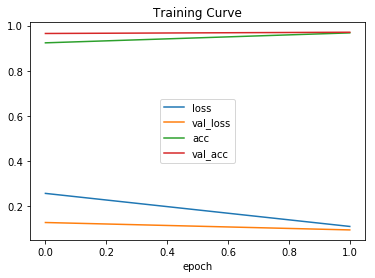

In [27]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.title('Training Curve')  
#plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['loss','val_loss', 'acc','val_acc'], loc='center')  
plt.show()

In [20]:
print (hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [21]:
# Check which items we got right / wrong
correct_indices = np.nonzero(result == y0_test)[0]
incorrect_indices = np.nonzero(result != y0_test)[0]
print(np.array(incorrect_indices).ndim)
print(incorrect_indices) ##incorrect_indices,correct_indices are 2 arrays
N_incorrect=np.array(incorrect_indices).size
print(N_incorrect)

1
[  33  149  151  247  259  290  318  321  340  445  447  495  543  551  578
  582  583  619  646  659  684  691  720  740  760  877  900  924  938  947
  951  956  965  995  999 1014 1044 1052 1107 1112 1128 1178 1182 1226 1232
 1242 1247 1260 1289 1299 1319 1348 1356 1393 1395 1433 1444 1496 1500 1522
 1527 1530 1549 1609 1681 1709 1717 1737 1751 1754 1773 1790 1878 1880 1901
 1938 1970 1982 1984 2004 2018 2024 2044 2053 2070 2098 2099 2109 2118 2130
 2135 2182 2186 2189 2266 2272 2293 2369 2387 2405 2406 2408 2433 2454 2462
 2488 2542 2635 2648 2654 2751 2770 2802 2877 2915 2921 2927 2930 2939 2953
 2979 2995 3005 3060 3062 3073 3117 3130 3206 3330 3422 3474 3475 3490 3503
 3520 3550 3558 3559 3567 3597 3662 3674 3681 3718 3723 3727 3757 3776 3780
 3796 3801 3811 3817 3818 3853 3876 3893 3902 3906 3926 3941 3943 3946 3985
 3995 4063 4065 4075 4078 4154 4163 4176 4201 4212 4224 4248 4289 4294 4306
 4355 4369 4374 4380 4415 4419 4449 4497 4504 4536 4567 4575 4601 4615 4639
 4656 4731

Prediction: 0 
 Answer: 4 
 Index: [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


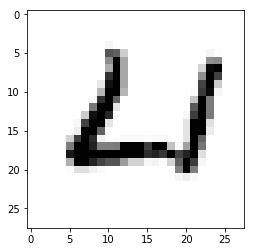

In [23]:
wrong=33
print("Prediction:",result[wrong],"\n","Answer:",y0_test[wrong],"\n","Index:",y_test[wrong])
plt.imshow(x0_test[wrong], cmap='Greys')

In [24]:
pick = np.random.randint(1,10,25)

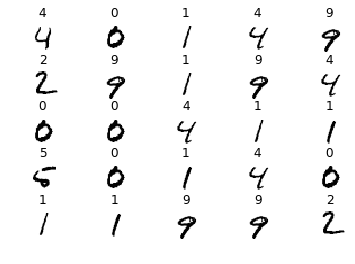

In [25]:
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(result[pick[i]])
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.axis("off")

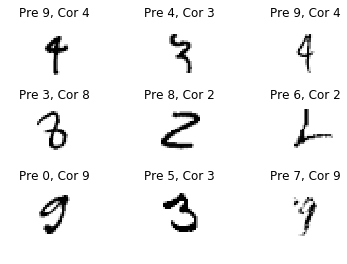

In [26]:
pick1 = np.random.randint(0,N_incorrect,9)
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x0_test[incorrect_indices[pick1[i]]], cmap='Greys', interpolation='none')
    plt.title("Pre {}, Cor {}".format(result[incorrect_indices[pick1[i]]], y0_test[incorrect_indices[pick1[i]]])) #Predict, Correct
    #plt.title(y0_test[pick[i]]result[pick1[i]])
    plt.axis("off")